In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Question 1

In [61]:
mat_file = loadmat("./ex7_data.mat")

In [62]:
X_train, X_test, y_train, y_test = mat_file['data'], mat_file['test_data'],\
    mat_file['labels'].reshape(-1), mat_file['test_labels'].reshape(-1)

# Questions 2 + 3

In [63]:
ETA = 0.01
w = np.random.normal(0, 0.01, size=X_train.shape[0])
validations_stops = np.append(np.arange(start=50, stop=X_train.shape[1], step=50), [
                   X_train.shape[1]-1])
experiment = pd.Series(index=validations_stops)


C:\Users\T-NWEI~1\AppData\Local\Temp/ipykernel_9928/2431946797.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  experiment = pd.Series(index=validations_stops)


In [64]:
def weights_accuracy(w, X, labels):
    wTx = np.apply_along_axis(lambda example: np.dot(
        example, w), axis=0, arr=X)
    p1 = 1 / (1 + np.exp(-wTx))
    vectpr_output = np.vectorize(lambda p: np.random.choice([0, 1], p=[1-p, p]))
    y = vectpr_output(p1)
    return np.sum(y == labels) / X.shape[1]


In [65]:
for i in range(X_train.shape[1]):
    x_value = X_train[:, i]
    p1 = 1 / (1 + np.exp(-np.dot(w, x_value)))  
    p0 = 1-p1  
    y = np.random.choice([0, 1], p=[p0, p1])
    reward = (y == y_train[i]).astype(int)  
    eligibility_w = (y - p1) * x_value  
    w += ETA * reward * eligibility_w
    if i in validations_stops:
        experiment[i] = weights_accuracy(w=w, X=X_test, labels=y_test)


# Question 4

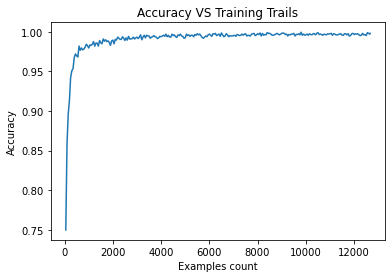

In [66]:
experiment.plot()
plt.title("Accuracy VS Training Trails")
plt.xlabel("Examples count")
plt.ylabel("Accuracy")
plt.show()

# Question 5

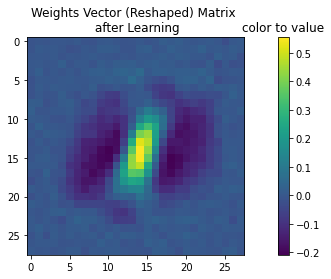

In [67]:
plt.imshow(w.reshape(28,28))
plt.colorbar(pad=0.1).ax.set_title("color to value")
plt.title("Weights Vector (Reshaped) Matrix \n after Learning")
plt.show()

ניתן לראות שהצבע מסביב לספרה אחת הוא הפכי לצבע שמסביב לספרה אפס. 
התמונה מייצגת את האופן שבו במספרים אפס ואחד נלמדו ברשת. לפי הנתונים, נראה ששחור תויג במערכת כערך נמוך המתקרב לאפס ומספר גבוה המתקרב לאחד את החלק הלבן, בהתאמה לכך שהמספר נכתב בלבן והרקע שחור.
 הלמידה מייצרת לנו וקטור משקולות יחיד המסווג את התמונות המוצגות לה כך שהלמידה מייחסת משקלים למקום התואם בקירוב לאזור התואם לאיפה שיש אחד בוקטורי הקלט ומשקולות מנוגדות לשטח שתואם לאזור בו יהיו אפסים.